In [1]:
import torch 
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from dataset import AfricanWildlifeDataset
from loss import YoloLoss
from YOLOv1 import YOLOv1
from train import train
from test import test
from utils import plot_bbox, get_boxes, non_max_suppression, compute_ap

In [5]:
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
BATCH_SIZE = 5
EPOCHS = 11
TRAIN_DIR = 'African_Wildlife/train'
TEST_DIR = 'African_Wildlife/test'
LABEL_DIR = 'African_Wildlife/annotations'
S, B, C = 7, 2, 4

## Loading data

In [3]:
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor()])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, transform=transform)
train_loader = DataLoader(
    dataset = train_set,
    batch_size = BATCH_SIZE, 
    shuffle = True
)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size= 3, shuffle= False)

## Training

In [4]:
model = YOLOv1(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss()


In [6]:
train(train_loader, model, optimizer, criterion, EPOCHS, DEVICE, load_model=True)


-> Loading checkpoint


100%|██████████| 240/240 [00:32<00:00,  7.29it/s, loss=0.00526]


 EPOCH 1:  Mean loss 0.006


100%|██████████| 240/240 [00:31<00:00,  7.53it/s, loss=0.00336]


 EPOCH 2:  Mean loss 0.006


100%|██████████| 240/240 [00:32<00:00,  7.47it/s, loss=0.00248]


 EPOCH 3:  Mean loss 0.005


100%|██████████| 240/240 [00:32<00:00,  7.49it/s, loss=0.00316]


 EPOCH 4:  Mean loss 0.005


100%|██████████| 240/240 [00:31<00:00,  7.52it/s, loss=0.00592]


 EPOCH 5:  Mean loss 0.006


100%|██████████| 240/240 [00:32<00:00,  7.47it/s, loss=0.00578]


 EPOCH 6:  Mean loss 0.008


100%|██████████| 240/240 [00:32<00:00,  7.42it/s, loss=0.00277]


 EPOCH 7:  Mean loss 0.006


100%|██████████| 240/240 [00:32<00:00,  7.50it/s, loss=0.00395]


 EPOCH 8:  Mean loss 0.005


100%|██████████| 240/240 [00:32<00:00,  7.48it/s, loss=0.00373]


 EPOCH 9:  Mean loss 0.004


100%|██████████| 240/240 [00:32<00:00,  7.49it/s, loss=0.00286]


 EPOCH 10:  Mean loss 0.004
-> Saving checkpoint


100%|██████████| 240/240 [00:32<00:00,  7.42it/s, loss=0.00498]

 EPOCH 11:  Mean loss 0.004


[0.005739808718984326,
 0.005534537486770811,
 0.005284311589396869,
 0.005431414248111347,
 0.006254226842429489,
 0.007830014755018055,
 0.0056708630213203525,
 0.004830924593261443,
 0.004046655447261098,
 0.004148668728400177,
 0.004363541892477466]

## Testing

In [7]:
y_pred = test(test_loader, model)

In [8]:
print(y_pred.size())

torch.Size([304, 49, 6])


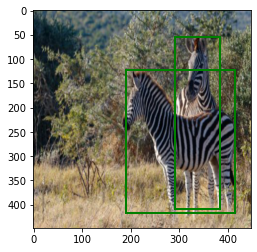

In [24]:
idx = 7
bbx = y_pred[idx, y_pred[idx, ::, 1] > 0]
plot_bbox(idx, test_set, bbx)

In [25]:
# what happens when you apply non_max_suppression()
# ex: image 7

pred = y_pred.tolist()
y_no_nms = pred[7]
print(y_no_nms) # pred for image 7
print('')

y_with_nms = non_max_suppression(y_no_nms)
print(y_with_nms)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 0.7106801867485046, 0.7533880472183228, 0.5154996514320374, 0.20753441751003265, 0.7907130122184753], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0

# MAP 

In [11]:
import torch
from utils import cellboxes_to_boxes, intersection_over_union
from test import filter_predictions


def new_test(test_loader, model, DEVICE='cuda', prob_thresh=0.6):
    model.eval()
    predictions_by_batch = []
    gt_by_batch = []
    for batch_idx, (x, y) in enumerate(test_loader):
        x, y = x.to(DEVICE), y.to(DEVICE)
        output = model(x) 
        # reshaping and converting coordinates
        output = torch.tensor(cellboxes_to_boxes(output))
        ground_truths = torch.tensor(cellboxes_to_boxes(y))

        # sigmoid on probabilities
        torch.sigmoid_(output[..., 1])
        predictions_by_batch.append(output)
        gt_by_batch.append(ground_truths) 

    y_pred = torch.cat(tuple(predictions_by_batch))
    y_pred = filter_predictions(y_pred, prob_thresh)
    y_true = torch.cat(tuple(gt_by_batch))

    return y_pred, y_true


In [12]:
y_pred, y_true = new_test(test_loader, model)

In [13]:
print(y_pred.size()) 
print(y_true.size()) 

torch.Size([304, 49, 6])
torch.Size([304, 49, 6])


In [16]:
pred_boxes, true_boxes = get_boxes(y_pred, y_true) 

In [26]:
print('number of predictions:', len(pred_boxes))
print('number of ground truths:', len(true_boxes))
print('total images in predictions:', pred_boxes[-1][0]) 
# there is no prediction for image 303
print('total images in ground truths:', true_boxes[-1][0]) 
print(' ')

image = 7
print('predictions:')
for box in pred_boxes: 
    if box[0]==image: 
        print(box)
print(' ')
print('ground truths:')
for box in true_boxes: 
    if box[0]==image:
        print(box)

number of predictions: 235
number of ground truths: 501
total images in predictions: 302
total images in ground truths: 303
 
predictions:
[7, 3.0, 0.7350617051124573, 0.6770945191383362, 0.6015040874481201, 0.5009430050849915, 0.6562455296516418]
 
ground truths:
[7, 3.0, 1.0, 0.7488280534744263, 0.5270270109176636, 0.21171900629997253, 0.8621619939804077]
[7, 3.0, 1.0, 0.6656249761581421, 0.6135140657424927, 0.5265630483627319, 0.6837840676307678]


In [23]:
mean_average_precision = compute_ap(pred_boxes, true_boxes) 
print('Mean average precision:', mean_average_precision) 

Mean average precision: tensor(0.0013)


**WHAT HAPPENS AFTER USING GET_BOXES**: 

The example is done for image_index = 2

**Predictions**:

- before get_boxes
    - [1.0000, 0.6355, 0.5036, 0.5225, 0.2986, 0.5557]
    - [1.0000, 0.6153, 0.5264, 0.6451, 0.1391, 0.3311]

- after get_boxes
    - [2, 1.0, 0.6354579329490662, 0.5036216974258423, 0.5224883556365967, 0.2985595762729645, 0.5557100772857666]

**Ground Truth**:

- befor get_boxes
    - [1.0000, 1.0000, 0.1391, 0.3313, 0.2156, 0.4750]
    - [1.0000, 1.0000, 0.4102, 0.3177, 0.4141, 0.4771]
    - [1.0000, 1.0000, 0.8406, 0.2917, 0.3188, 0.5000]

- after get_boxes
    - [2, 1.0, 1.0, 0.1390630006790161, 0.33125004172325134, 0.21562500298023224, 0.4750000238418579]
    - [2, 1.0, 1.0, 0.4101560413837433, 0.31770798563957214, 0.4140619933605194, 0.4770830273628235]
    - [2, 1.0, 1.0, 0.8406250476837158, 0.29166704416275024, 0.3187500238418579, 0.5]